<a href="https://colab.research.google.com/github/bulentsoykan/IDS6938-Computational-Optimization-Models-and-Methods/blob/main/Knapsack_problem_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to the Knapsack Problem using Greedy Algorithms

In this notebook, we will explore the knapsack problem and solve it using various greedy algorithms to understand the concept of optimization.

#### Definition:
The knapsack problem involves selecting a subset of items, each with a value and a weight, to include in a knapsack of limited capacity, such that the total value is maximized without exceeding the weight capacity.

Let's dive into the problem and its solution using Python.

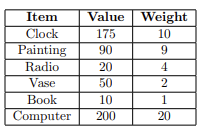

In [19]:
# Define the Item class that will be used to represent each item
class Item(object):
    def __init__(self, n, v, w):
        self._name = n
        self._value = v
        self._weight = w
    def get_name(self):
        return self._name
    def get_value(self):
        return self._value
    def get_weight(self):
        return self._weight
    def __str__(self):
        return f'<{self._name}, {self._value}, {self._weight}>'

### Explanation:
- The `Item` class represents an individual item with three attributes: name, value, and weight.
- The class provides methods to access these attributes and a `__str__` method to neatly print the item details.

---

In [20]:
# Define a function to get the value of an item
def value(item):
    return item.get_value()

### Explanation:
- The `value` function serves as a key function to extract the value attribute from an `Item` object. This will be useful for sorting items by value.

---

In [21]:
# Define a function to get the inverse of the weight of an item
def weight_inverse(item):
    return 1.0/item.get_weight()

### Explanation:
- The `weight_inverse` function returns the inverse of the item's weight. This helps prioritize items with lower weight when used as a key for sorting.

---

In [22]:
# Define a function to get the density (value-to-weight ratio) of an item
def density(item):
    return item.get_value()/item.get_weight()

### Explanation:
- The `density` function calculates the value-to-weight ratio for an item. This ratio indicates the item's value per unit of weight, helping prioritize items that provide the most value with the least weight.

---

In [23]:
# Implement the greedy algorithm to solve the knapsack problem
def greedy(items, max_weight, key_function):
    """Assumes items a list, max_weight >= 0,
       key_function maps elements of items to numbers"""
    items_copy = sorted(items, key=key_function, reverse = True)
    result = []
    total_value, total_weight = 0.0, 0.0
    for i in range(len(items_copy)):
        if (total_weight + items_copy[i].get_weight()) <= max_weight:
            result.append(items_copy[i])
            total_weight += items_copy[i].get_weight()
            total_value += items_copy[i].get_value()
    return (result, total_value)

### Explanation:
- The `greedy` function implements the greedy algorithm to solve the knapsack problem.
- **Inputs:**
  - `items`: A list of `Item` objects.
  - `max_weight`: The maximum weight capacity of the knapsack.
  - `key_function`: A function used to sort the items based on a specific criterion (e.g., value, weight inverse, density).
- **Process:**
  - The items list is sorted using the `key_function` in descending order.
  - The function iterates through the sorted list and adds items to the knapsack as long as the total weight does not exceed the maximum capacity.
- **Outputs:**
  - `result`: A list of items included in the knapsack.
  - `total_value`: The total value of the items in the knapsack.

---

In [24]:
# Build the list of items
def build_items():
    names = ['clock','painting','radio','vase','book','computer']
    values = [175,90,20,50,10,200]
    weights = [10,9,4,2,1,20]
    Items = []
    for i in range(len(values)):
        Items.append(Item(names[i], values[i], weights[i]))
    return Items

### Explanation:
- The `build_items` function creates a list of `Item` objects.
- **Inputs:** None
- **Outputs:** A list of `Item` objects with predefined names, values, and weights.

---

In [25]:
# Test the greedy algorithm with a specific key function
def test_greedy(items, max_weight, key_function):
    taken, val = greedy(items, max_weight, key_function)
    print('Total value of items taken is', val)
    for item in taken:
        print('   ', item)

### Explanation:
- The `test_greedy` function tests the greedy algorithm with a given set of items, maximum weight, and key function.
- **Inputs:**
  - `items`: A list of `Item` objects.
  - `max_weight`: The maximum weight capacity of the knapsack.
  - `key_function`: The function to be used for sorting items.
- **Outputs:** None (prints the results)
- **Process:**
  - Runs the `greedy` function and prints the total value of items included in the knapsack as well as the items themselves.

---

In [26]:
# Test the greedy algorithm with different key functions
def test_greedys(max_weight = 20):
    items = build_items()
    print('Use greedy by value to fill knapsack of size', max_weight)
    test_greedy(items, max_weight, value)
    print('\nUse greedy by weight to fill knapsack of size',
          max_weight)
    test_greedy(items, max_weight, weight_inverse)
    print('\nUse greedy by density to fill knapsack of size',
          max_weight)
    test_greedy(items, max_weight, density)

### Explanation:
- The `test_greedys` function tests the greedy algorithm using different key functions to determine which strategy yields the best results.
- **Inputs:**
  - `max_weight`: The maximum weight capacity of the knapsack (default is 20).
- **Process:**
  - Builds a predefined set of items using the `build_items` function.
  - Runs the `test_greedy` function three times:
    - First, sorts by value.
    - Second, sorts by the inverse of weight.
    - Third, sorts by density (value-to-weight ratio).
- **Outputs:** None (prints the results for each strategy)

---

In [27]:
test_greedys()

Use greedy by value to fill knapsack of size 20
Total value of items taken is 200.0
    <computer, 200, 20>

Use greedy by weight to fill knapsack of size 20
Total value of items taken is 170.0
    <book, 10, 1>
    <vase, 50, 2>
    <radio, 20, 4>
    <painting, 90, 9>

Use greedy by density to fill knapsack of size 20
Total value of items taken is 255.0
    <vase, 50, 2>
    <clock, 175, 10>
    <book, 10, 1>
    <radio, 20, 4>


This prints the total value and items selected for each strategy (by value, by weight, and by density) so students can compare the outcomes.

In [28]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

In [29]:
def plot_knapsack(items, max_weight, key_function):
    """Run the greedy algorithm and visualize the results."""
    taken, total_value = greedy(items, max_weight, key_function)

    fig, ax = plt.subplots(figsize=(10, 6))
    y_pos = range(len(taken))

    # Plot each item in the knapsack
    for i, item in enumerate(taken):
        ax.barh(i, item.get_weight(), color='b')
        ax.text(item.get_weight() / 2, i, f'{item.get_name()}', color='w', ha='center', va='center', fontsize=12)

    ax.set_yticks(y_pos)
    ax.set_yticklabels([f'Item {item.get_name()}' for item in taken])
    ax.set_xlabel('Weight')
    ax.set_title(f'Items in the Knapsack (Total Value: {total_value})')
    ax.axvline(x=max_weight, color='r', linestyle='--', label='Knapsack Capacity')

    plt.legend()
    plt.show()

# Create the widgets
strategy_widget = widgets.Dropdown(
    options={'By Value': value, 'By Weight (Inverse)': weight_inverse, 'By Density': density},
    value=value,
    description='Strategy:'
)

weight_widget = widgets.IntSlider(
    value=20,
    min=1,
    max=50,
    step=1,
    description='Max Weight:',
    continuous_update=False
)

output = widgets.Output()

# Define the function to update the visualization based on widget inputs
def update_plot(change):
    with output:
        clear_output(wait=True)
        max_weight = weight_widget.value
        key_function = strategy_widget.value
        items = build_items()
        plot_knapsack(items, max_weight, key_function)

# Attach the update function to widget events
strategy_widget.observe(update_plot, names='value')
weight_widget.observe(update_plot, names='value')

# Display the widgets and the initial plot
display(strategy_widget, weight_widget, output)
update_plot(None)

Dropdown(description='Strategy:', options={'By Value': <function value at 0x7a106a5b05e0>, 'By Weight (Inverse…

IntSlider(value=20, continuous_update=False, description='Max Weight:', max=50, min=1)

Output()